# Laboratorio 2 Parte B - Base64 y XOR
## Universidad del Valle de Guatemala
## Cifrado de información

Andrés de la Roca - 20332

#### Ejercicio 5
Implementar una función que haga la operación XOR, bit a bit, con dos cadenas de texto.

- Recuerde que la llave debe ser de menor o igual tamaño que la palabra
- Si en dado caso la llave es menor complementarla para llegar al mismo tamaño


In [17]:
def encriptar_con_xor(mensaje, keystream):

    # Si el keystream es mas corto que el mensaje, se repite el keystream hasta que sea del mismo tamaño que el mensaje
    while len(keystream) < len(mensaje):
        keystream += keystream

    # Realiza la operación XOR entre cada byte del mensaje y la clave correspondiente del keystream
    mensaje_encriptado = [mensaje[i] ^ keystream[i] for i in range(len(mensaje))]
    return bytes(mensaje_encriptado)

In [18]:
texto = b'Hola, este es un mensaje secreto'
clave = b'clave'

resultado = encriptar_con_xor(texto, clave)
print(resultado)

b'+\x03\r\x17IC\t\x12\x02\x00C\t\x12V\x10\rL\x0c\x13\x0b\x10\r\x0b\x13E\x10\t\x02\x04\x00\x17\x03'


#### Ejercicio 6
Dada la imagen XOR_Imagen, y la llave “cifrados” encontrar el valor original de la imagen.
- Deben de convertir la imagen a base 64 y aplicarle un xor con la llave “cifrados para encontrar su valor”

In [21]:
imagen = "imagen_xor/imagen_xor.png"

llave = b"cifrados"

with open(imagen, "rb") as f:
    imagen_bytes = f.read()

imagen_resultante = encriptar_con_xor(imagen_bytes, llave)

with open("imagen_xor/imagen_xor_cifrada.png", "wb") as f:
    f.write(imagen_resultante)
    print("Imagen cifrada guardada en imagen_xor_descifrada.png")

Imagen cifrada guardada en imagen_xor_descifrada.png


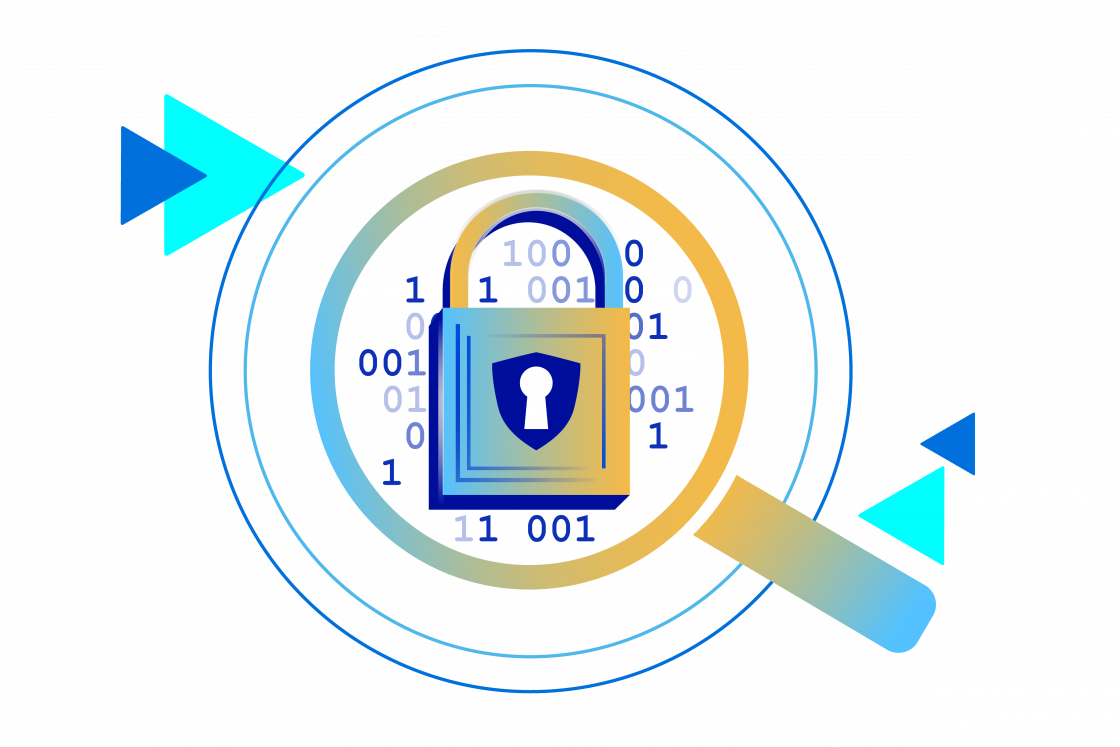

#### Ejercicio 7
Investigar porque al aplicar XOR con una llave de texto la imagén se corrompe.

R/. La operación XOR entre una imagen y una llave puede corromper la imagen porque la operación XOR es una operación de bits, y al aplicarla a una imagen, la imagen esta compuesta por bits que representan diferentes tipos de informacion como el color de la imagen. El resultado de la operacion XOR cambia el valor de los bits de la imagen, lo que puede resultar en una imagen corrupta. Adicionalmente, hay que tener en cuenta que el formato de la imagen puede no ser valido para la operacion XOR debido a que puede contener informacion adicional (Headers, metadatos, etc) que al modificarse causan que la imagen se corrompa.

#### Ejercicio 8
Investigar como aplicar un xor a 2 imagnes. Para esto deben de eleccionar 2 imágenes, luego proceder hacer un xor entre las dos imágenes. Esto significa que una imagen es la original y la otra se utilizará como llave para aplicar el xor.
- Mostrar las imágenes utilizadas y el resultado, asi mismo explique que inconvenientes encontro al momento de realizar el xor.

In [28]:
# Implementacion con librerias

from PIL import Image
import numpy as np

imagen1 = Image.open("imagenes_prueba/bulbasaur.jpg")
imagen2 = Image.open("imagenes_prueba/charmander.jpg")

img1_np = np.array(imagen1)
img2_np = np.array(imagen2)

result_np = img1_np ^ img2_np

result_img = Image.fromarray(result_np)
result_img.save("imagenes_prueba/bulbasaur_xor_charmander.png")
result_img.show()

# Imagen resultante es visible


In [27]:
# Implementacion sin librerias

imagen1 = "imagenes_prueba/bulbasaur.jpg"
imagen2 = "imagenes_prueba/charmander.jpg"

with open(imagen1, "rb") as f:
    imagen1_bytes = f.read()

with open(imagen2, "rb") as f:
    imagen2_bytes = f.read()

imagen_resultante = encriptar_con_xor(imagen1_bytes, imagen2_bytes)

with open("imagen_resultante_xor.jpg", "wb") as f:
    f.write(imagen_resultante)
    print("Imagen resultante guardada")

# Imagen resultante es corrupta

Imagen resultante guardada


#### Imagen 1
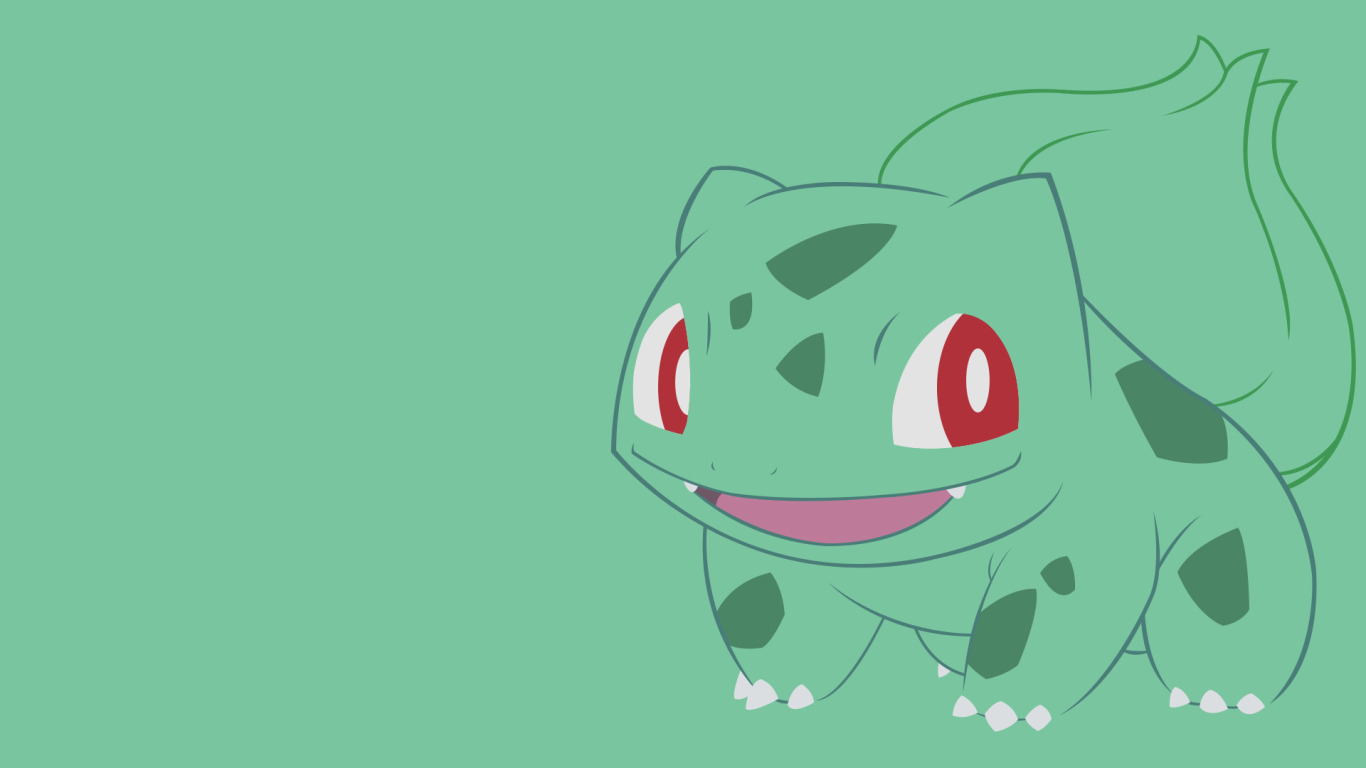

#### Imagen 2
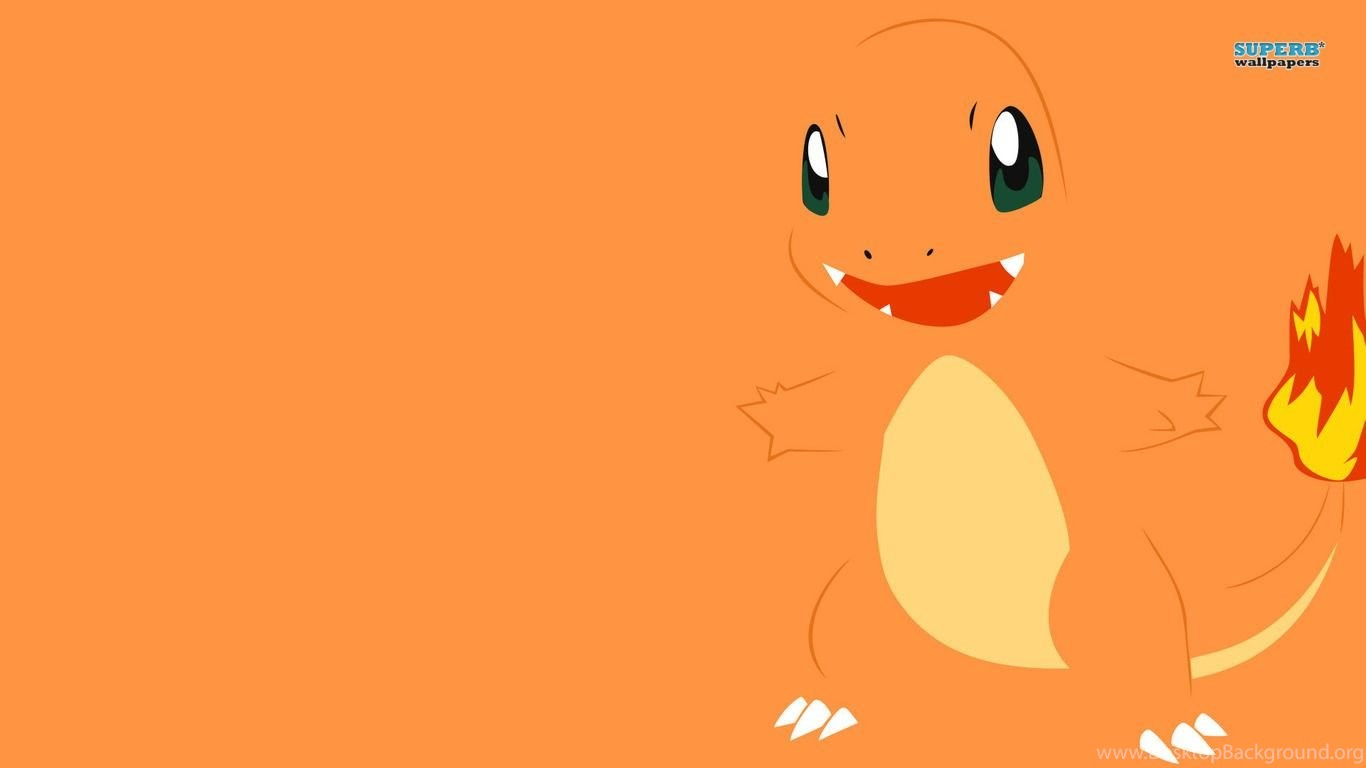

#### Resultado
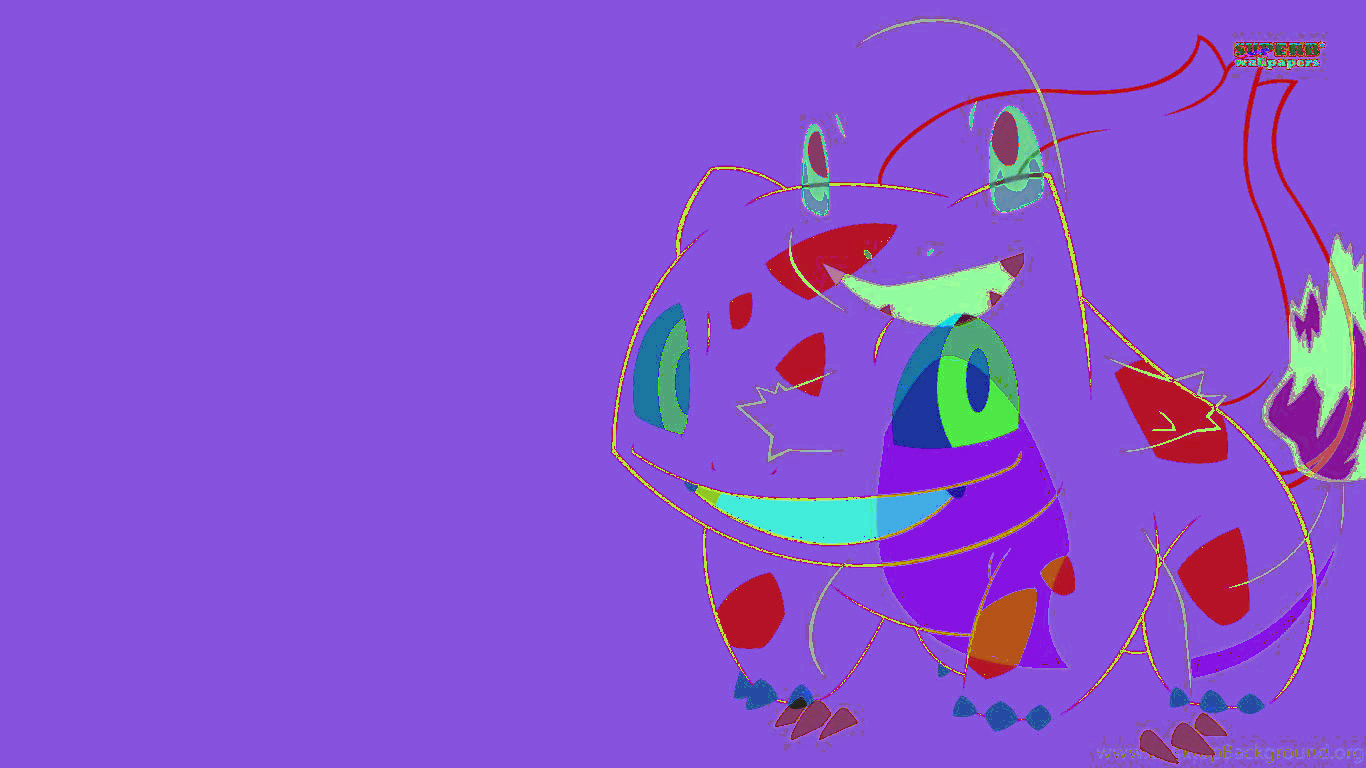

R/. Al realizar la operacion XOR entre las dos imagenes se obtiene una imagen que parece ser una combinacion entre las dos, las dos implementaciones que se realizaron tuvieron resultados diferentes, mientras que la implementacion sin librerias externas resulto estar corrupta, la que si utilizo librerias externas resulto ser una combinacion de las dos imagenes. Esto puede ser debido a que la operacion XOR entre dos imagenes no es una operacion que se pueda realizar directamente, ya que las imagenes contienen informacion adicional que puede corromperse al realizar la operacion XOR, algo que las librerias externas han tomado en cuenta y han implementado para que la operacion sea exitosa.
Adicionalmente, se tuvieron que utilizar imagenes con el mismo tamaño para poder realizar una operacion XOR valida.

#### Ejercicio 9
- Dada una cadena de bits X (por ejemplo, una que proviene de convertir un texto a bits).
- Calcular la distribución de probabilidad de ocurrencia sus bits ’0’ y ’1’, y mostrarlo en un histograma. ¿Son iguales?
  - Repetir lo mismo para los bigramas ’00’, ’01’, ’10’, ’11’;
  - Repetir para los trigramas ’000’, ’001’, ’010’, ’011’, ’100’, ’101’, ’110’, ’111’.
- ¿Qué ocurre con la distribución de probabilidades?

Mensaje original: Hola mundo
Mensaje en binario: 01001000011011110110110001100001001000000110110101110101011011100110010001101111


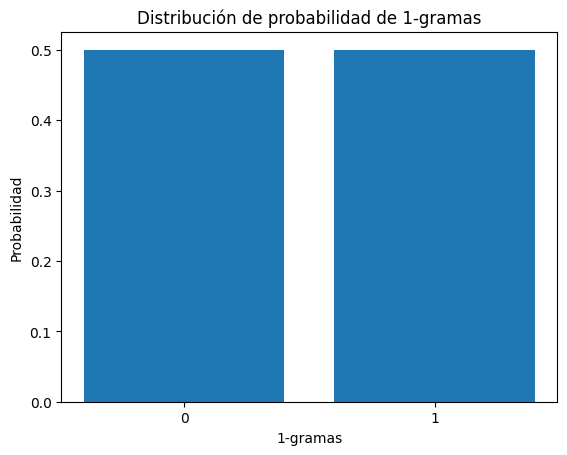

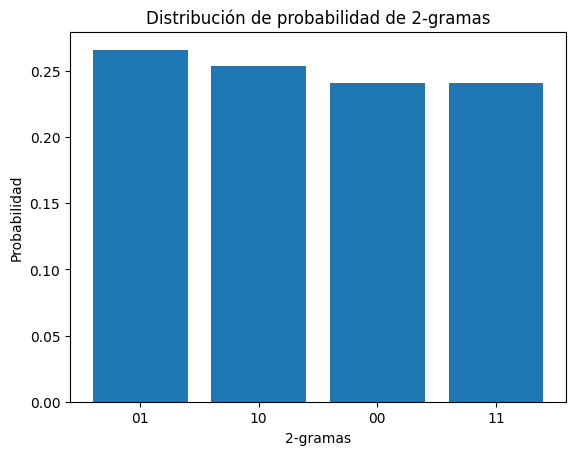

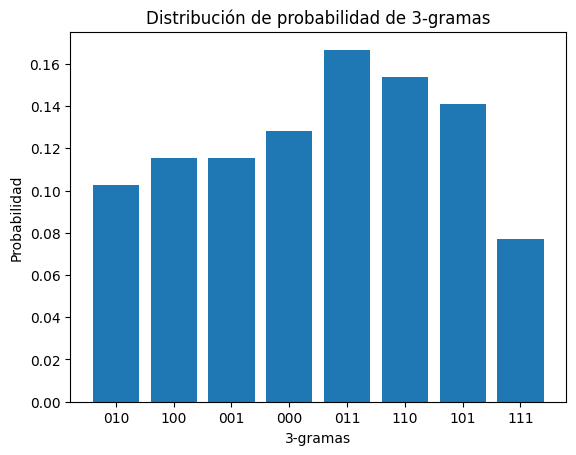

In [30]:
import matplotlib.pyplot as plt
from collections import Counter

def calculate_probability_dist(data, n):
    # Calcular n-gramas
    ngrams = [data[i:i+n] for i in range(len(data) - n + 1)]

    # Calcular la distribución de probabilidad
    probabilities = Counter(ngrams)
    total_occurrences = sum(probabilities.values())

    # Calcular las probabilidades normalizadas
    probabilities_normalized = {k: v / total_occurrences for k, v in probabilities.items()}

    return probabilities_normalized

def plot_histogram(probabilities, n):
    labels = ["".join(str(bit) for bit in key) for key in probabilities.keys()]
    values = list(probabilities.values())

    plt.bar(labels, values)
    plt.title(f'Distribución de probabilidad de {n}-gramas')
    plt.xlabel(f'{n}-gramas')
    plt.ylabel('Probabilidad')
    plt.show()


# Convert string to binary 0s and 1s
def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

mensaje = "Hola mundo"
print("Mensaje original:", mensaje)
mensaje_binario = text_to_bits(mensaje)
print("Mensaje en binario:", mensaje_binario)

probabilidades = calculate_probability_dist(mensaje_binario, 1)
plot_histogram(probabilidades, 1)

probabilidades = calculate_probability_dist(mensaje_binario, 2)
plot_histogram(probabilidades, 2)

probabilidades = calculate_probability_dist(mensaje_binario, 3)
plot_histogram(probabilidades, 3)
